# 09. Основы обработки естественного языка (NLP)

## I. Предобработка текста

### 1) Загрузка корпуса текстов

In [ ]:
input_data = "Hello Mr. Smith, how are you doing today? The weather is better than yesterday and Python is awesome."
print(input_data)

Hello Mr. Smith, how are you doing today? The weather is better than yesterday and Python is awesome.


### 2) Токенизация

In [ ]:
import nltk

from nltk.tokenize import sent_tokenize
nltk.download('punkt')

corpus = sent_tokenize(input_data)
print(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Hello Mr. Smith, how are you doing today?', 'The weather is better than yesterday and Python is awesome.']


#### 2.1) Регулярные выражения

Регулярное выражение (регулярка, regexp, regex) – это последовательность символов, которая определяет шаблон поиска. Например:

- . – любой символ, кроме перевода строки;
- \w – один символ;
- \d – одна цифра;
- \s – один пробел;
- \W – один НЕсимвол;
- \D – одна НЕцифра;
- \S – один НЕпробел;
- [abc] – находит любой из указанных символов match any of a, b, or c;
- [^abc] – находит любой символ, кроме указанных;
- [a-g] – находит символ в промежутке от a до g.

In [ ]:
import re

corpus = [re.sub("[^A-Za-z]", " ", text) for text in corpus]
print(corpus)

['Hello Mr  Smith  how are you doing today ', 'The weather is better than yesterday and Python is awesome ']


In [ ]:
from nltk.tokenize import word_tokenize

corpus = [word_tokenize(text) for text in corpus]
print(corpus[0])

['Hello', 'Mr', 'Smith', 'how', 'are', 'you', 'doing', 'today']


### 3) Стоп-слова

In [ ]:
nltk.download('stopwords')

tmp = []
for text in corpus:
  text = [word for word in text if word not in set(nltk.corpus.stopwords.words("english"))]
  tmp.append(text)

corpus = tmp
print(corpus)

[['Hello', 'Mr', 'Smith', 'today'], ['The', 'weather', 'better', 'yesterday', 'Python', 'awesome']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 4) Нормализация

#### 4.1) Стемминг

In [ ]:
stemmer = nltk.stem.PorterStemmer()

tmp = []
for text in corpus:
  text = [stemmer.stem(word) for word in text]
  tmp.append(text)

corpus1 = tmp
print(corpus1)

[['hello', 'mr', 'smith', 'today'], ['the', 'weather', 'better', 'yesterday', 'python', 'awesom']]


#### 4.2) Лемматизация

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

lemmatizer = nltk.stem.WordNetLemmatizer()

tmp = []
for text in corpus:
  text = [lemmatizer.lemmatize(word) for word in text]
  tmp.append(text)

corpus2 = tmp
print(corpus2)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


[['Hello', 'Mr', 'Smith', 'today'], ['The', 'weather', 'better', 'yesterday', 'Python', 'awesome']]


In [ ]:
print(lemmatizer.lemmatize("better"))
print(lemmatizer.lemmatize("better", pos="a"))  # pos='a' adjective

better
good


In [ ]:
#!pip install spacy
import spacy
# загружаем модели пакета spacy для лемматизации английского языка
#!python -m spacy download en_core_web_sm
en_nlp = spacy.load('en_core_web_sm')

tmp = []
for text in corpus:
  print(' '.join(text))
  text_spacy = en_nlp(' '.join(text))
  text = [token.lemma_ for token in text_spacy]
  tmp.append(text)

print(tmp)


tmp = []
for text in sent_tokenize(input_data):
  text = re.sub("[^A-Za-z]", " ", text)
  text_spacy = en_nlp(text)
  text = [token.lemma_ for token in text_spacy]
  tmp.append(text)

print(tmp)

Hello Mr Smith today
The weather better yesterday Python awesome
[['hello', 'Mr', 'Smith', 'today'], ['the', 'weather', 'well', 'yesterday', 'Python', 'awesome']]
[['hello', 'Mr', ' ', 'Smith', ' ', 'how', 'be', 'you', 'do', 'today'], ['the', 'weather', 'be', 'well', 'than', 'yesterday', 'and', 'Python', 'be', 'awesome']]


## II. Векторное представление текстов

### Модель «Мешок слов»

In [ ]:
corpus = sent_tokenize(input_data)

# Выполняем токенизацию и создаем словарь:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(corpus)

# Доступ к словарю через атрибут vocabulary_
print("Размер словаря: {}".format(len(vect.vocabulary_)))
print("Содержимое словаря: {}".format(vect.vocabulary_))

Размер словаря: 17
Содержимое словаря: {'hello': 5, 'mr': 8, 'smith': 10, 'how': 6, 'are': 1, 'you': 16, 'doing': 4, 'today': 13, 'the': 12, 'weather': 14, 'is': 7, 'better': 3, 'than': 11, 'yesterday': 15, 'and': 0, 'python': 9, 'awesome': 2}


In [ ]:
X_train = vect.transform(corpus)
print("bag_of_words: {}".format(repr(X_train)))

bag_of_words: <2x17 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>


In [ ]:
print("Плотное представление bag_of_words:\n{}".format(X_train.toarray()))

Плотное представление bag_of_words:
[[0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1]
 [1 0 1 1 0 0 0 2 0 1 0 1 1 0 1 1 0]]


#### Распределение Ципфа

Если отсортировать слова по убыванию частоты их употребления то получим график Ципфа – эмпирический закон распределения частот слов, применяемый в лингвистике.

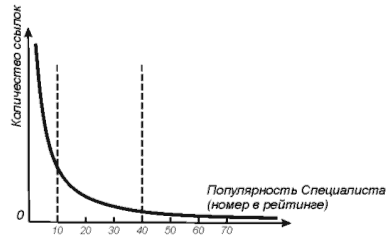


### Модель TF-IDF

Разработаны различные способы для представления текстов в виде числовых данных. Многие способы опираются на подсчет статистики использования слов в документах. Далее рассмотрим метод TF-IDF, которые опирается на статистику слов в документах.

TF-DF (от англ. TF – term frequency (частота слова),
IDF – inverse document frequency (обратная частота документа)) – это статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов (корпуса). Согласно TF-IDF вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции. На основе меры TF-IDF документы коллекции могут быть представлены в виде числовых векторов, отражающих важность использования каждого слова в каждом документе.

Данная модель называется векторной моделью и даёт возможность сравнивать тексты, сравнивая представляющие их вектора по какой-либо метрике (например, евклидово расстояние, мера на основе косинуса угла между векторами, манхэттенское расстояние, расстояние Чебышёва или др.). Это применяется
* в задачах анализа текстов,
* при информационного поиска, как один из критериев релевантности документа поисковому запросу,
* при кластеризации для расчёта меры близости документов.

Мера TF-IDF для конкретного слова является произведением двух сомножителей и вычисляется по формуле:

$$ tf-idf(t,d,D) = tf(t,d) * idf(t,D)$$

Большой вес в TF-IDF получат слова с высокой частотой в пределах конкретного документа и с низкой частотой употреблений в других документах.

TF (частота слова) – отношение числа вхождений некоторого слова $t$ к общему числу слов документа (оценка важности слова в пределах отдельного документа).

$$ tf(t,d) = \frac{n_t}{\sum_k n_k}$$

где $n_t$ – число вхождений слова $t$ в документ $d$, а в знаменателе – общее число слов в данном документе.

IDF (обратная частота документа) – инверсия частоты, с которой слово встречается в документах коллекции.

$$ idf(t,D) = \log\frac{|D|}{|\{ d_i\in D, t\in d_i\}|}$$

$|D|$ – число документов в коллекции,

$|\{ d_i\in D, t\in d_i\}|$ – число документов из коллекции $D$, в которых встречается $t$.

Выбор основания логарифма в формуле не имеет значения, поскольку изменение основания приводит к изменению веса каждого слова на постоянный множитель, что не влияет на соотношение весов.

Учёт IDF уменьшает вес широкоупотребительных слов. Для каждого уникального слова в пределах конкретной коллекции документов существует только одно значение IDF.

Для получения модели TF-IDF из текста необходимо:
1.	Токенизация. Разбиваем каждый документ на слова, которые встречаются в нем (токены), например, с помощью пробелов и знаков пунктуации.
2.	Построение словаря. Собираем словарь всех слов, которые появляются в любом из документов, и пронумеровываем их (например, в алфавитном порядке).
3.	Создание матрицы TF-IDF. Для каждого документа корпуса подсчитываем, как часто каждое из слов, занесенное в словарь, встречается в документе и во всем корпусе документов. Вычисляем меру TF-IDF для каждого слова документа.

В итоге каждый документ можно представить в виде числового вектора. В полученном числовом представлении каждый признак (вход НС) соответствует определенному уникальному слову набора данных. Формируя TF-IDF, не учитывается структура исходного текста – главы, параграфы, предложения, форматирование. Для представления признаков TF-IDF, порядок слов в исходной строке и документе в целом не имеет значения (аналогично модели «Мешок слов»).

Модель TF-IDF на практике имеет множество модификаций, как связанных с расчетом значения TF-IDF, так и способом реализации.
В библиотеке Scikit-learn (https://scikit-learn.org) метод TF-IDF реализован в двух классах:
* TfidfVectorizer – принимает на вход текстовые данные и выполняет преобразование TF-IDF (на выходе – матрица в формате TF-IDF).
* TfidfTransformer – принимает на вход разреженную матрицу, полученную с помощью CountVectorizer, и преобразует ее в TF-IDF.

Оба класса применяют нормализацию L2 после того, как вычисляют представление TF-IDF, т.е. они масштабируют векторизованное представление каждого документа к единичной евклидовой норме – длине.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(X.shape)

np.set_printoptions(precision=2)
print("Матрица TF-IDF:\n{}".format(X.toarray()))

['and' 'are' 'awesome' 'better' 'doing' 'hello' 'how' 'is' 'mr' 'python'
 'smith' 'than' 'the' 'today' 'weather' 'yesterday' 'you']
(2, 17)
Матрица TF-IDF:
[[0.   0.35 0.   0.   0.35 0.35 0.35 0.   0.35 0.   0.35 0.   0.   0.35
  0.   0.   0.35]
 [0.29 0.   0.29 0.29 0.   0.   0.   0.58 0.   0.29 0.   0.29 0.29 0.
  0.29 0.29 0.  ]]


 ### Модель TF-IDF с использованием N-грамм

N-граммы – последовательности из нескольких идущих подряд или токенов (слов) или символов.

В символьных N-граммах берём 3 или более подряд идущих символа. В пословных N-граммах аналогично, только со словами.

Пример, фраза: «Днём мама мыла раму»

2-граммы из слов: «днём мама», «мама мыла», «мыла раму»

3-граммы из символов: «днё», «нём», «ём_», «м_м», «_ма», «мам», …

N-граммы широко применяются в NLP. Использование N-грамм:
* Модель достаточно простая (не сильно усложняется).
* Появляется устойчивость к опечаткам и словоизменению – можно частично обойтись без исправления опечаток и использования сложных алгоритмов нормализации текстов (лематизация и морфологический анализ).
* Пословные N-граммы более специфичны по сравнению с отдельными словами – т.е. они встречаются реже, но если встречаются являются более сильным фактором и поэтому они могут лучше описывать особенности тематики текстов.

Один из главных недостатков представления "мешок слов" и TF-IDF заключается в полном игнорировании порядка слов. Две строки  "it’s good, not bad at all" и "it’s bad, not good at all" будут иметь одинаковое представление, хотя противоположны по смыслу. Это пример того, какое важное значение имеет контекст.
N-грамма – это применение векторной модели (CountVectorizer или TfidfVectorizer) для последовательностей из нескольких слов.
Также в алгоритмах встречаются символьные N-граммы.

N-граммы – это способ, позволяющий учитывать контекст при использовании представления "мешок слов", фиксируя не только частоты одиночных токенов, но и пары, тройки токенов, которые появляются рядом друг с другом.

Пары токенов называют биграммами, тройки токенов – триграммы,
в общем случае последовательности токенов известны как N-граммы.

Задать диапазон токенов, которые рассматриваются в качестве признаков (значение N), можно указав параметр ngram_range для CountVectorizer или TfidfVectorizer. ngram_range задает нижнюю и верхнюю границы диапазона N: будут использованы все значения N, которые удовлетворяют условию min_n <= N <= max_n. По умолчанию min_n=1 и max_n=1 – одиночные токены (юниграммы).
Используем для poet_words юниграммы, биграммы и триграммы:

In [ ]:
#По умолчанию min_n=1 и max_n=1 – одиночные токены (юниграммы).

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь: {}".format(cv.get_feature_names_out()))

Размер словаря: 17
Словарь: ['and' 'are' 'awesome' 'better' 'doing' 'hello' 'how' 'is' 'mr' 'python'
 'smith' 'than' 'the' 'today' 'weather' 'yesterday' 'you']


In [ ]:
#Чтобы задать биграммы (последовательности из двух токенов, следующих друг за другом) установим ngram_range равным (2, 2):

cv = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names_out()))
print("Векторное представление:\n{}".format(cv.transform(corpus).toarray()))

Размер словаря: 16
Словарь:
['and python' 'are you' 'better than' 'doing today' 'hello mr' 'how are'
 'is awesome' 'is better' 'mr smith' 'python is' 'smith how'
 'than yesterday' 'the weather' 'weather is' 'yesterday and' 'you doing']
Векторное представление:
[[0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1]
 [1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0]]


Использование длинных последовательностей токенов, как правило, приводит к гораздо большему числу признаков и большей детализации признаков.

В большинстве прикладных задач минимальное количество токенов в последовательности должно быть равно единице, поскольку одиночные слова позволяют зафиксировать многие смысловые значения. Максимальное количество токенов в N-грамме – как правило не более 5.

Добавление биграмм помогает во многих случаях.
Включение в анализ более длинных последовательностей, вплоть до 5-грамм, тоже может помочь в улучшении качества модели, но это вызовет большой рост количества признаков и может привести к переобучению, поскольку появится большое количество детализированных признаков.


Оценка количества: Количество биграмм может быть равно количеству юниграмм, возведенному в квадрат, а количество триграмм может быть равно количеству юниграмм в кубе, что приведет к очень большому пространству признаков.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 3)).fit(corpus)
print("Размер словаря: {}".format(len(tfidf.vocabulary_)))
print("Словарь:\n{}".format(tfidf.get_feature_names_out()))

Размер словаря: 47
Словарь:
['and' 'and python' 'and python is' 'are' 'are you' 'are you doing'
 'awesome' 'better' 'better than' 'better than yesterday' 'doing'
 'doing today' 'hello' 'hello mr' 'hello mr smith' 'how' 'how are'
 'how are you' 'is' 'is awesome' 'is better' 'is better than' 'mr'
 'mr smith' 'mr smith how' 'python' 'python is' 'python is awesome'
 'smith' 'smith how' 'smith how are' 'than' 'than yesterday'
 'than yesterday and' 'the' 'the weather' 'the weather is' 'today'
 'weather' 'weather is' 'weather is better' 'yesterday' 'yesterday and'
 'yesterday and python' 'you' 'you doing' 'you doing today']


Использование длинных последовательностей токенов, как правило, приводит к гораздо большему числу признаков и большей детализации признаков.

В большинстве прикладных задач минимальное количество токенов в последовательности должно быть равно единице, поскольку одиночные слова позволяют зафиксировать многие смысловые значения.

Добавление биграмм помогает во многих случаях. Включение в анализ более длинных последовательностей, вплоть до 5-грамм, тоже может помочь, но это вызовет взрывной рост количества признаков и может привести к переобучению, поскольку появится большое количество детализированных признаков.

Оценка количества: Количество биграмм может быть равно количеству юниграмм, возведенному в квадрат, а количество триграмм может быть равно количеству юниграмм в кубе, что приведет к очень большому пространству признаков.

При использовании N-грамм необходимо учитывать:

* Высокая размерность и разреженность. Размерность пространства растет очень быстро, а вектора получаются очень разреженными. Чем больше N тем реже встречается соответствующая N-грамма.

* Здесь, как и у одиночных слов, – близкие по смыслу слова (например, «кружка», «чашка») кодируются независящими друг от друга элементами вектора – в результате может страдать обобщающая способность.

* Ввиду того, что размерность вектора очень большая (как и у одиночных слов) – в результате на небольшой обучающей выборке высока вероятность переобучения.

### TF-IDF: Анализ признаков

Применение модели TF-IDF вместо обычных частот слов (мешка слов) как правило ведет к улучшению качества.

Рассмотрим набор данных и выведем слова, которые в результате преобразования TF-IDF стали наиболее и наименее важными для документов. Также отметим, что понятие "важное слово", согласно алгоритма TF-IDF, необязательно связано с интересующими нас метками - "положительный отзыв" и "отрицательный отзыв".

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/SarthakRana/Restaurant-Reviews-using-NLP-/master/Restaurant_Reviews.tsv'
reviews_data = pd.read_csv(url, sep = "\t")
reviews_data.columns = ["review", "liked"]
reviews_data.head()

,review,liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df_train = reviews_data[:]

text_train, y_train = df_train.iloc[:, 0], df_train.iloc[:, 1]

print(text_train.shape)

(1000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit(text_train)
X_train = vectorizer.transform(text_train)
print(X_train.shape)
print(vectorizer.get_feature_names_out())
print(X_train[0:5,0:70]) # возвращаются только ненулевые частоты для пар предложение-слово
#print(X_train)

(1000, 2035)
['00' '10' '100' ... 'yum' 'yummy' 'zero']
  (2, 64)	0.16724341982474072
  (3, 64)	0.09173368784273846
  (4, 64)	0.15380480656635295


In [ ]:
print(X_train.max(axis=0))

  (0, 0)	0.3111148505375976
  (0, 1)	0.30710510678710823
  (0, 2)	0.5326446092551044
  (0, 3)	0.25768048250439995
  (0, 4)	0.3463789304207074
  (0, 5)	0.3554285401494549
  (0, 6)	0.3637930087671377
  (0, 7)	0.3109692161800724
  (0, 8)	0.4706118167230026
  (0, 9)	0.3937860274473437
  (0, 10)	0.3618244351529989
  (0, 11)	0.36223867878354243
  (0, 12)	0.2885065985446549
  (0, 13)	0.3867494686176509
  (0, 14)	0.4061533847196904
  (0, 15)	0.33566889246660503
  (0, 16)	0.32005411222941393
  (0, 17)	0.3429937350037847
  (0, 18)	0.3429937350037847
  (0, 19)	0.3062908890377469
  (0, 20)	0.26498042650330733
  (0, 21)	0.43825542986417987
  (0, 22)	0.25768048250439995
  (0, 23)	0.42198455701794846
  (0, 24)	0.3402059265757244
  :	:
  (0, 2010)	0.7294150661710829
  (0, 2011)	0.2674017313395308
  (0, 2012)	0.6778470250293764
  (0, 2013)	0.2715089406265714
  (0, 2014)	0.5452190476226532
  (0, 2015)	0.2660750752356896
  (0, 2016)	0.43795569010976054
  (0, 2017)	0.3900954576342873
  (0, 2018)	0.4122894

In [ ]:
import numpy as np

# Находим максимальное значение каждого признака по набору данных
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# Получаем имена признаков
feature_names = np.array(vectorizer.get_feature_names_out())

print("Признаки с наименьшими значениями TF-IDF:\n{}".format(
feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями TF-IDF: \n{}".format(
feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями TF-IDF:
['descriptions' 'eel' 'sauces' 'loves' 'bone' 'prepare' 'deep' 'temp'
 'gloves' 'oil' 'bare' 'held' 'event' 'hereas' 'thru' 'somehow' 'loving'
 'guys' 'son' 'bloodiest']
Признаки с наибольшими значениями TF-IDF: 
['good' 'thoroughly' 'insulted' 'meh' 'both' 'terrible' 'prices'
 'disappointing' 'fantastic' 'disgrace' 'touch' 'loved' 'sucks' 'awful'
 'packed' 'mediocre' 'sooooo' 'mortified' 'waited' 'delicious']


Признаки с низкими значениями TF-IDF – это признаки, которые либо встречаются во многих документах, либо используются редко и только в очень длинных документах.

Также можно найти слова, которые имеют низкое значение обратной частоты документа (IDF), т.е. слова, которые встречаются часто и поэтому считаются менее важными. Значения IDF, найденные для обучающего набора, хранятся в атрибуте idf_

In [ ]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями idf:\n{}".format(
feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями idf:
['the' 'and' 'was' 'to' 'is' 'it' 'this' 'of' 'food' 'not' 'place' 'for'
 'in' 'good' 'service' 'we' 'my' 'very' 'with' 'had' 'be' 'so' 'that'
 'great' 'have' 'but' 'back' 'were' 'are' 'here' 'they' 'you' 'at' 'on'
 'like' 'go' 'time' 'all' 'our' 'will' 'there' 'just' 'really' 'as' 'an'
 'best' 'their' 'would' 'ever' 'if' 'also' 'friendly' 'don' 'one' 'only'
 'nice' 'out' 'up' 'your' 'never' 'restaurant' 'amazing' 'again' 'what'
 'delicious' 'no' 'can' 've' 'vegas' 'been' 'which' 'by' 'from'
 'experience' 'when' 'came' 'me' 'did' 'some' 'eat' 'love' 'even' 'or'
 'won' 'disappointed' 'us' 'definitely' 'pretty' 'get' 'staff' 'going'
 'much' 'more' 'first' 'bad' 'got' 'made' 'about' 'say' 'could']


In [ ]:
print(feature_names[sorted_by_tfidf[-20:]])
print(max_value[sorted_by_tfidf[-20:]])
dict_freq = {i:j for i,j in zip(feature_names[sorted_by_tfidf[-20:]],max_value[sorted_by_tfidf[-20:]])}
print(dict_freq)

['good' 'thoroughly' 'insulted' 'meh' 'both' 'terrible' 'prices'
 'disappointing' 'fantastic' 'disgrace' 'touch' 'loved' 'sucks' 'awful'
 'packed' 'mediocre' 'sooooo' 'mortified' 'waited' 'delicious']
[0.82 0.83 0.83 0.83 0.84 0.85 0.85 0.86 0.86 0.87 0.88 0.88 0.88 0.88
 0.89 0.89 0.91 0.95 0.98 1.  ]
{'good': 0.8247505962691464, 'thoroughly': 0.8265849441389045, 'insulted': 0.82934566382534, 'meh': 0.8318750298539495, 'both': 0.8369759598773905, 'terrible': 0.8472982393270684, 'prices': 0.8519571015020487, 'disappointing': 0.8589837451729564, 'fantastic': 0.8646568951476906, 'disgrace': 0.8660978066473745, 'touch': 0.8768247173892318, 'loved': 0.8795289888692361, 'sucks': 0.8837128187982934, 'awful': 0.8837128187982934, 'packed': 0.885288238455099, 'mediocre': 0.8869698098675498, 'sooooo': 0.9052346109283829, 'mortified': 0.9512145701950588, 'waited': 0.9842848621126474, 'delicious': 1.0}


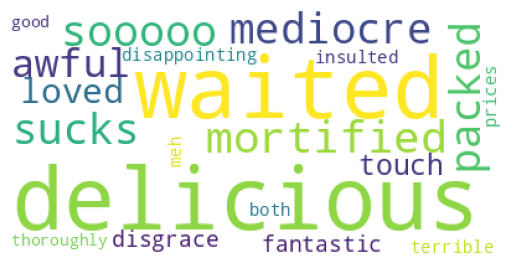

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate_from_frequencies(dict_freq)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## III. Классификация текстов

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/SarthakRana/Restaurant-Reviews-using-NLP-/master/Restaurant_Reviews.tsv'
reviews_data = pd.read_csv(url, sep = "\t")
df_train = reviews_data[:]
data, labels = df_train.iloc[:, 0], df_train.iloc[:, 1]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer().fit(data)
X = vectorizer.transform(text_train)
print(X.shape)

(1000, 2035)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print ('LogisticRegression: ',
       accuracy_score(model.predict(X_test), y_test))

LogisticRegression:  0.81


# Домашние задания

1) Используя набор данных Restaurant_Reviews.tsv, получить классификатор с наибольшей точностью предсказания.

Нужно использовать следующие возможности NLP:

I. Операции предобработки текста
- stop-words
- lemmatization
- stemming

II. Методы векторного представления текстов
- Bag of words
- TF-IDF
- N-gramms

III. Методы классификации:
- MultinomialNB
- LogisticRegression
- LinearSVC
- RandomForestClassifier